# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Dandiset Version: 0.250311.2145**

**Caution: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.**

## Overview of the Dandiset

This Dandiset, titled "Allen Institute Openscope - Barcoding," focuses on investigating how visual neurons, particularly in mice, respond to white noise flicker visual stimuli. The experiments aimed to understand temporal precision in neural responses across different visual areas, including cortical and subcortical regions like the superior colliculus.

The core idea revolves around the "bar-code-like" patterns observed in spike rasters when white noise stimuli are presented repeatedly. These patterns are consistent across individual animals and even species, leading to the hypothesis that they could serve as identifiers for discrete cell types. This dataset provides these "barcodes" for visually responsive neurons throughout the mouse brain.

Key aspects explored include:
- Responses to full-field flicker white noise.
- Responses to static sinusoidal gratings with contrast modulated by white noise.
- Data from novel electrode configurations to capture large populations of subcortical neurons.

The data includes extracellular electrophysiology (Neuropixels), LFP, optogenetic stimulation, and behavioral data like eye tracking and running wheel activity.

**Link to the Dandiset:** [https://dandiarchive.org/dandiset/000563/0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145)

**Citation:**
Reinagel, Pamela; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Carlson, Mikayla; Peene, Carter; Bawany, Ahad; Johnson, Tye; Amaya, Avalon; Han, Warren; Wilkes, Josh; Nguyen, Katrina; Suarez, Lucas; Naidoo, Robyn; Ouellette, Ben; Grasso, Conor ; Loeffler, Henry; Belski, Hannah; Williford, Ali; Swapp, Jackie; Howard, Robert (2025) Allen Institute Openscope - Barcoding (Version 0.250311.2145) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000563/0.250311.2145

## What this notebook covers

This notebook will guide you through:
1. Listing the required Python packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Selecting and loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
4. Exploring the basic structure and metadata of the loaded NWB file.
5. Visualizing some of the data contained within the NWB file, such as eye tracking and running speed.
6. Providing a summary and potential next steps for analysis.

## Required Packages

To run this notebook, you'll need the following Python packages. We assume these are already installed on your system.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for working with NWB files)
*   `h5py` (for HDF5 file access, a dependency of pynwb)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `pandas` (for data manipulation, especially with NWB tables)
*   `seaborn` (for enhanced visualizations)

No `pip install` commands are included here.

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # Changed asset.asset_id back to asset.identifier

Dandiset name: Allen Institute Openscope - Barcoding
Dandiset URL: https://dandiarchive.org/dandiset/000563/0.250311.2145
Dandiset description: Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This experiment used the OpenScope Neuropixels passive viewing protocol, and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gra

## Loading an NWB file from the Dandiset

We will now load one of the NWB files from this Dandiset to explore its contents.

The file we'll be working with is: `sub-681446/sub-681446_ses-1290510496_ogen.nwb`

The DANDI asset ID for this file is `2f2ac304-83a3-4352-8612-5f34b68062a0`.

The direct download URL for this asset is: `https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/`

We will use `pynwb`, `h5py`, and `remfile` to stream and read this remote NWB file.

In [2]:
import pynwb
import h5py
import remfile

# Define the URL for the NWB file
nwb_asset_id = "2f2ac304-83a3-4352-8612-5f34b68062a0"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file using remfile for remote access
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Session ID: 1290510496
Session Description: Data and metadata for an Ecephys session
Identifier: 1290510496
Session Start Time: 2023-08-16 00:00:00-07:00


### Neurosift Link for NWB File Exploration

You can explore this NWB file interactively using Neurosift:

[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f2ac304-83a3-4352-8612-5f34b68062a0/download/&dandisetId=000563&dandisetVersion=0.250311.2145)

(Note: Neurosift link uses dandisetVersion "draft" if the specific version is not yet processed by Neurosift, but for published versions like this one, the version ID should work. Here we use the specific version provided)

### Summarizing the NWB File Contents

The NWB file format organizes data hierarchically. Let's look at some of the main groups and datasets available in the loaded file (`sub-681446/sub-681446_ses-1290510496_ogen.nwb`). This file primarily contains optogenetic stimulation data and associated behavioral measurements.

Here's a partial summary based on the `nwb-file-info` tool output:

*   **`session_description`**: (str) Data and metadata for an Ecephys session
*   **`identifier`**: (str) 1290510496
*   **`session_start_time`**: (datetime) 2023-08-16T00:00:00-07:00
*   **`acquisition`**: Contains raw acquired data.
    *   `EyeTracking`: (EllipseEyeTracking)
        *   `spatial_series`:
            *   `corneal_reflection_tracking`: (EllipseSeries) Data shape (488419, 2)
            *   `eye_tracking`: (EllipseSeries) Data shape (488419, 2)
            *   `pupil_tracking`: (EllipseSeries) Data shape (488419, 2), contains `area`, `width`, `height`, `angle`, `timestamps`.
        *   `likely_blink`: (TimeSeries) Data shape (488419,)
    *   `raw_running_wheel_rotation`: (TimeSeries) Data shape (432000,)
    *   `running_wheel_signal_voltage`: (TimeSeries) Data shape (432000,)
*   **`processing`**: Contains processed data.
    *   `optotagging`: (ProcessingModule)
        *   `optotagging`: (OptogeneticSeries) Data shape (450,)
        *   `optogenetic_stimulation`: (TimeIntervals) Table with columns like `start_time`, `condition`, `level`, `stop_time`. (450 rows)
    *   `running`: (ProcessingModule)
        *   `running_speed`: (TimeSeries) Data shape (420018,)
        *   `running_speed_end_times`: (TimeSeries) Data shape (420018,)
        *   `running_wheel_rotation`: (TimeSeries) Data shape (420018,)
    *   `stimulus`: (ProcessingModule)
        *   `timestamps`: (TimeSeries) Stimulus presentation timestamps, Data shape (405120,)
*   **`intervals`**: Contains categorized time intervals.
    *   `RepeatFFF_presentations`: (TimeIntervals) Table for 'RepeatFFF' stimuli. (43200 rows)
    *   `UniqueFFF_presentations`: (TimeIntervals) Table for 'UniqueFFF' stimuli. (14400 rows)
    *   `invalid_times`: (TimeIntervals)
    *   `receptive_field_block_presentations`: (TimeIntervals) (1920 rows)
    *   `static_block_presentations`: (TimeIntervals) (345600 rows)
*   **`subject`**: Information about the experimental subject.
    *   `age`: P112D
    *   `genotype`: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
    *   `sex`: M
    *   `species`: Mus musculus
    *   `subject_id`: 681446
*   **`units`**: Spike sorting results (though this specific `_ogen.nwb` file might focus more on opto and behavior, ecephys files would have rich unit data).
    *   A table with columns like `isi_violations`, `snr`, `spike_times`, `waveform_mean`, etc. (2572 units reported for the broader session this file is part of, check presence in this specific file if focusing on units here).

We will now visualize a few of these.

## Visualizing Data from the NWB File

Let's load and plot some example data. We'll start with pupil size from the `EyeTracking` module and running speed.

### Pupil Size Over Time

The `pupil_tracking` EllipseSeries within `EyeTracking` contains various metrics including pupil area. We'll plot the pupil area over a short segment of time.

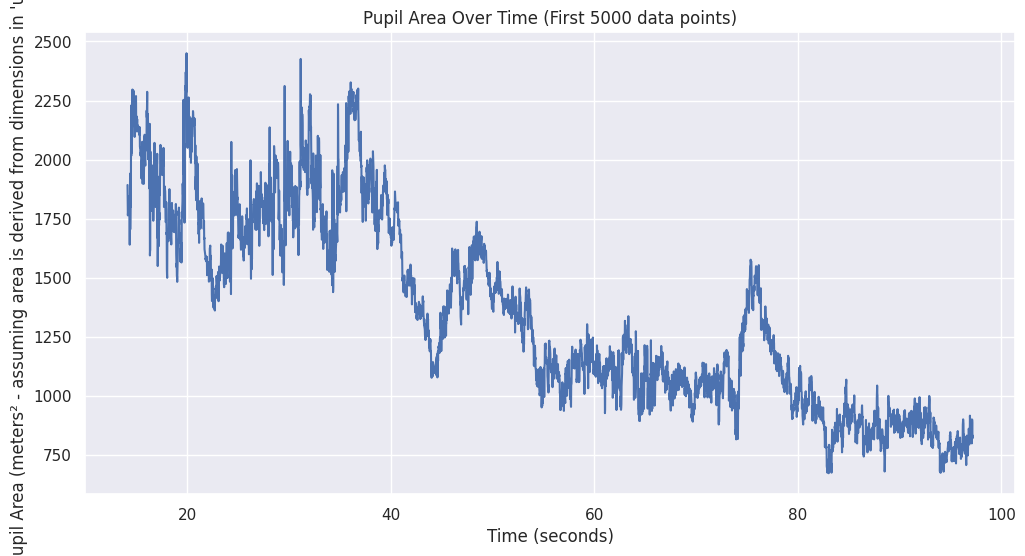

In [3]:
# Access pupil tracking data
try:
    pupil_tracking = nwb.acquisition['EyeTracking'].spatial_series['pupil_tracking']
    pupil_area = pupil_tracking.area
    pupil_timestamps = pupil_tracking.timestamps

    # Select a subset of data to plot (e.g., first 5000 points) to keep the plot manageable
    # and reduce data loading time from the remote file.
    num_points_to_plot_pupil = 5000
    
    # Check if data and timestamps exist and have enough points
    if pupil_area is not None and pupil_timestamps is not None and \
       len(pupil_area) > num_points_to_plot_pupil and \
       len(pupil_timestamps) > num_points_to_plot_pupil:
        
        pupil_area_subset = pupil_area[:num_points_to_plot_pupil]
        pupil_timestamps_subset = pupil_timestamps[:num_points_to_plot_pupil]

        plt.figure(figsize=(12, 6))
        plt.plot(pupil_timestamps_subset, pupil_area_subset)
        plt.xlabel(f"Time ({pupil_tracking.timestamps_unit})")
        plt.ylabel(f"Pupil Area ({pupil_tracking.unit}² - assuming area is derived from dimensions in 'unit')")
        plt.title(f"Pupil Area Over Time (First {num_points_to_plot_pupil} data points)")
        plt.show()
    else:
        print("Pupil tracking data or timestamps are missing, empty, or too short for the selected subset.")
        if pupil_area is not None: print(f"Pupil area length: {len(pupil_area)}")
        if pupil_timestamps is not None: print(f"Pupil timestamps length: {len(pupil_timestamps)}")

except KeyError:
    print("Could not find 'EyeTracking' or 'pupil_tracking' in nwb.acquisition.spatial_series.")
except Exception as e:
    print(f"An error occurred while plotting pupil data: {e}")

### Running Speed Over Time

Next, let's visualize the animal's running speed, which is available in `nwb.processing['running']['running_speed']`.

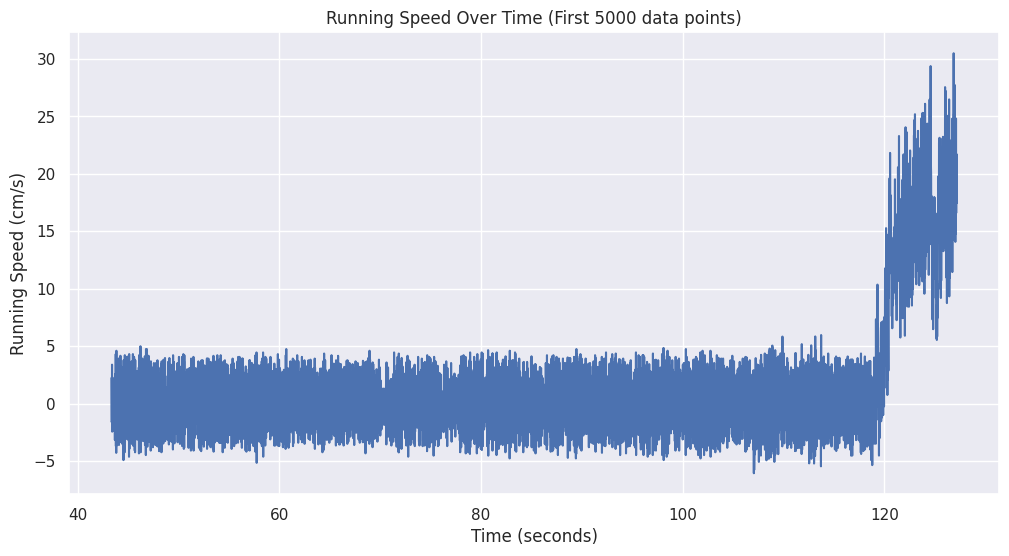

In [4]:
try:
    running_speed_ts = nwb.processing['running']['running_speed']
    running_speed_data = running_speed_ts.data
    running_speed_timestamps = running_speed_ts.timestamps

    # Select a subset of data, e.g., first 5000 points or a specific time window
    num_points_to_plot_running = 5000

    if running_speed_data is not None and running_speed_timestamps is not None and \
       len(running_speed_data) > num_points_to_plot_running and \
       len(running_speed_timestamps) > num_points_to_plot_running:

        running_speed_data_subset = running_speed_data[:num_points_to_plot_running]
        running_speed_timestamps_subset = running_speed_timestamps[:num_points_to_plot_running]

        plt.figure(figsize=(12, 6))
        plt.plot(running_speed_timestamps_subset, running_speed_data_subset)
        plt.xlabel(f"Time ({running_speed_ts.timestamps_unit})")
        plt.ylabel(f"Running Speed ({running_speed_ts.unit})")
        plt.title(f"Running Speed Over Time (First {num_points_to_plot_running} data points)")
        plt.show()
    else:
        print("Running speed data or timestamps are missing, empty, or too short for the selected subset.")
        if running_speed_data is not None: print(f"Running speed data length: {len(running_speed_data)}")
        if running_speed_timestamps is not None: print(f"Running speed timestamps length: {len(running_speed_timestamps)}")
        
except KeyError:
    print("Could not find 'running_speed' in nwb.processing['running'].")
except Exception as e:
    print(f"An error occurred while plotting running speed data: {e}")

### Optogenetic Stimulation
The file `sub-681446/sub-681446_ses-1290510496_ogen.nwb` suggests it contains optogenetic data.
Let's inspect the `optogenetic_stimulation` table from `nwb.processing['optotagging']`.

Optogenetic Stimulation Table (first 5 rows):
    start_time                     condition  level   stop_time  \
id                                                                
0   7265.11890      Each pulse is 10 ms wide   0.97  7266.11890   
1   7267.06938      Each pulse is 10 ms wide   0.77  7268.06938   
2   7268.80883       Each pulse is 6 ms wide   1.35  7269.80883   
3   7270.86814  half-period of a cosine wave   0.77  7271.86814   
4   7273.01894       Each pulse is 6 ms wide   0.97  7274.01894   

        stimulus_name  duration                   tags  \
id                                                       
0    5 hz pulse train       1.0  [optical_stimulation]   
1    5 hz pulse train       1.0  [optical_stimulation]   
2   40 hz pulse train       1.0  [optical_stimulation]   
3       raised_cosine       1.0  [optical_stimulation]   
4   40 hz pulse train       1.0  [optical_stimulation]   

                                           timeseries  
id                   

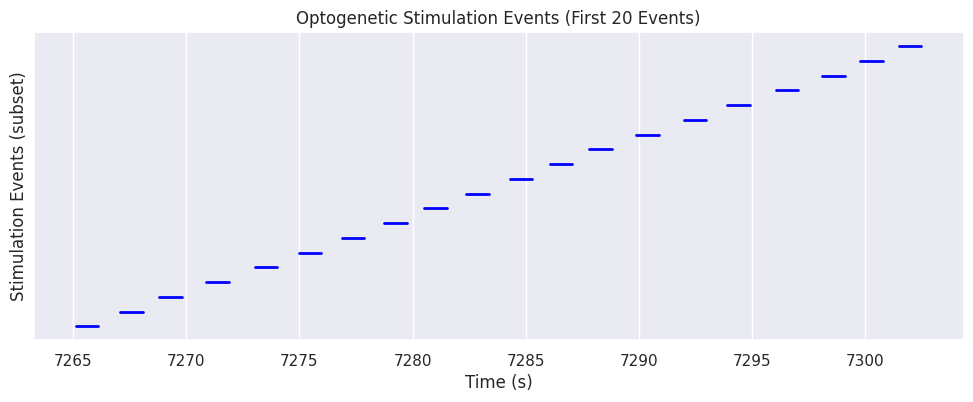

In [5]:
try:
    optogenetic_stimulation_table = nwb.processing['optotagging']['optogenetic_stimulation']
    
    # Convert to pandas DataFrame for easier viewing
    # We need to select which columns to display if there are many, or display .head()
    df_opto_stim = optogenetic_stimulation_table.to_dataframe()
    
    print("Optogenetic Stimulation Table (first 5 rows):")
    print(df_opto_stim.head())
    
    # We can also plot the timing of these stimulations
    # For example, plot a raster of stimulation events based on start_time and duration
    plt.figure(figsize=(12, 4))
    for index, row in df_opto_stim.head(20).iterrows(): # Plot first 20 events for clarity
        plt.plot([row['start_time'], row['stop_time']], [index, index], color='blue', lw=2)
    plt.yticks([]) # Hide y-axis ticks as they just represent event index here
    plt.xlabel("Time (s)")
    plt.ylabel("Stimulation Events (subset)")
    plt.title("Optogenetic Stimulation Events (First 20 Events)")
    plt.show()

except KeyError:
    print("Could not find 'optotagging' or 'optogenetic_stimulation' in nwb.processing.")
except Exception as e:
    print(f"An error occurred while accessing optogenetic stimulation data: {e}")

## Combined Visualization: Pupil Size and Running Speed

To explore potential relationships, we can plot pupil size and running speed on the same timeline.
Since they might have different scales, we'll use a twin y-axis.
We need to be careful about aligning timestamps if their sampling rates are different. For simplicity,
we'll plot them against their own timestamps but ensure the x-axis (time) is shared.
We'll use the previously selected subsets.

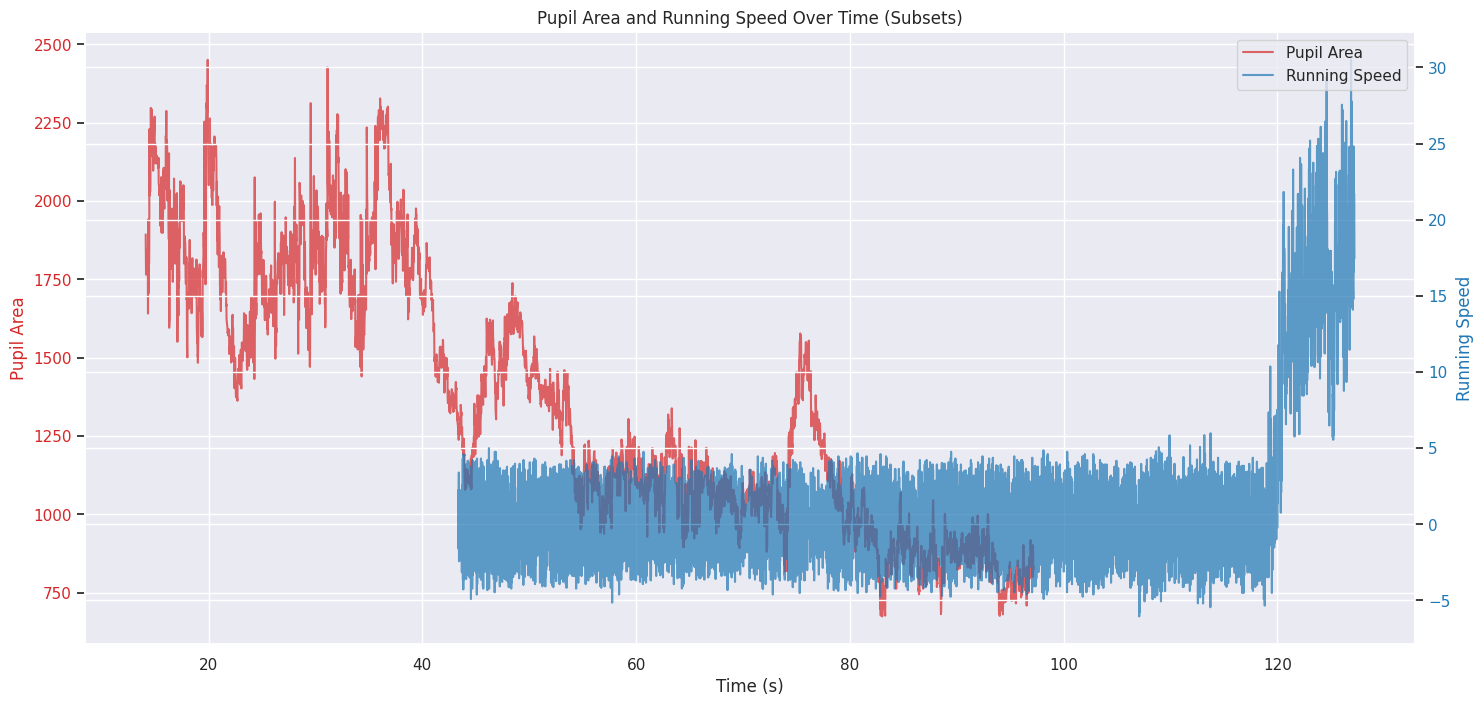

In [6]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Pupil Area', color=color)
if 'pupil_timestamps_subset' in locals() and 'pupil_area_subset' in locals():
    ax1.plot(pupil_timestamps_subset, pupil_area_subset, color=color, alpha=0.7, label='Pupil Area')
    ax1.tick_params(axis='y', labelcolor=color)
else:
    print("Pupil data subset not available for combined plot.")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Running Speed', color=color)  # we already handled the x-label with ax1
if 'running_speed_timestamps_subset' in locals() and 'running_speed_data_subset' in locals():
    ax2.plot(running_speed_timestamps_subset, running_speed_data_subset, color=color, alpha=0.7, label='Running Speed')
    ax2.tick_params(axis='y', labelcolor=color)
else:
    print("Running speed data subset not available for combined plot.")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Pupil Area and Running Speed Over Time (Subsets)')
# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()

## Summary and Future Directions

This notebook demonstrated how to:
1.  Connect to the DANDI Archive and retrieve Dandiset metadata.
2.  List assets within a Dandiset.
3.  Load a specific NWB file (`sub-681446/sub-681446_ses-1290510496_ogen.nwb`) by streaming it from its DANDI URL.
4.  Inspect basic metadata and structure of the NWB file.
5.  Visualize example timeseries data: pupil area, running speed, and optogenetic stimulation events.
6.  Create a combined plot to compare two different types of timeseries data.

### Possible Future Directions for Analysis:

*   **Detailed Stimulus Analysis:** The Dandiset is rich in stimulus presentation data (e.g., `RepeatFFF_presentations`, `static_block_presentations`). One could analyze neural or behavioral responses time-locked to specific stimulus events or types. For instance, how does pupil size or running speed change in response to different visual stimuli or optogenetic perturbations?
*   **Correlating Behavior with Neural Activity:** If working with the paired `_ecephys.nwb` files (not loaded here, but available in the Dandiset), one could correlate the spike times of individual units or LFP signals with behavioral states like running speed, pupil dilation, or specific stimulus presentations.
*   **Optogenetic Effects:** Analyze the effect of optogenetic stimulation (from `optogenetic_stimulation` table) on behavior (pupil, running) or neural activity (if using ecephys files).
*   **Exploring other NWB files:** This Dandiset contains multiple NWB files, including those with detailed ecephys data (`_probe-X_ecephys.nwb`). Exploring these files would allow for analysis of neural spiking activity, LFP, etc.
*   **Advanced Visualizations:** Create more sophisticated visualizations, such as heatmaps of neural activity aligned to stimulus onset, or statistical comparisons of behavioral metrics across different experimental conditions.
*   **Data across Sessions/Subjects:** Once familiar with single-file analysis, one could extend this to analyze data across multiple sessions or subjects within the Dandiset to look for consistent patterns or group differences.

Remember to always be mindful of data sizes when loading from remote files and consider loading subsets for initial exploration, as demonstrated.

This concludes our initial exploration of Dandiset 000563 and one of its NWB files. Hopefully, this notebook provides a useful starting point for your own analyses!

In [7]:
# Final check on NWB object before closing (optional, io.close() will be called implicitly by Python's garbage collector or if context manager was used)
# For this notebook, explicit io.close() is not strictly required by the instructions.
# print("NWB file object before potential close:", nwb)
# io.close() # Optional: explicitly close the file if desired, though script end will handle it.
# print("NWB I/O object closed.")